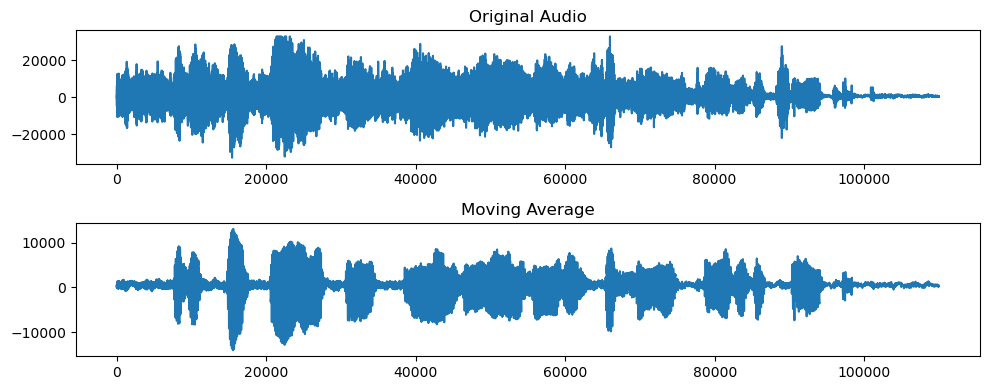

In [48]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

#criando fn para calcular a média móvel
def calculate_moving_average(audio, window_size)->np.array:
    size = len(audio) - window_size + 1
    moving_average = np.zeros(size)
    for i in range(size):
        moving_average[i] = np.mean(audio[i:i+window_size])
    return moving_average
#carregando arquivo
sample_rate, audio_data = wavfile.read('fala_sino.wav')

#tamanho da janela
window_size = 40
moving_average = calculate_moving_average(audio_data, window_size)

#salvando arquivo
wavfile.write('fala_sino_moving_average.wav', sample_rate, moving_average.astype(np.int16))
#plotando gráfico comparativo
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(audio_data)
plt.title('Original Audio')
plt.subplot(2, 1, 2)
plt.plot(moving_average)
plt.title('Moving Average')
plt.tight_layout()
plt.show()



C:\Users\Meu PC\AppData\Local\Temp\ipykernel_3192\2379451632.py:5: RuntimeWarning: overflow encountered in short_scalars
  y[n] = x[n] - x[n-1]


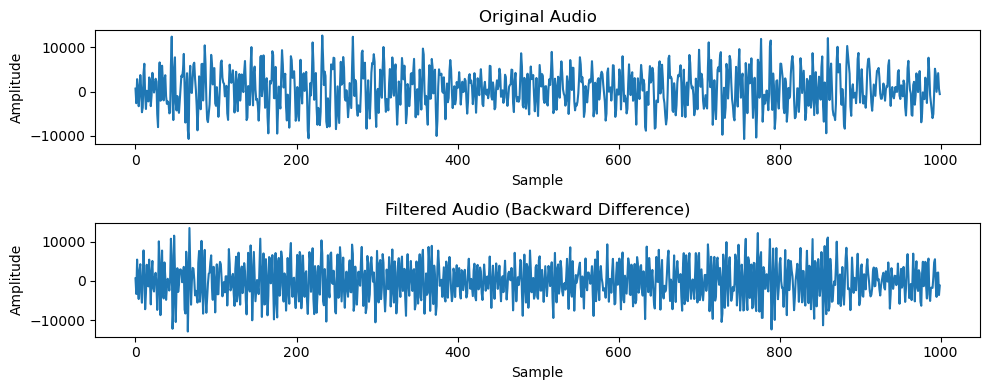

In [28]:
def backward_difference(x):
    y = np.zeros_like(x)
    y[0] = x[0]
    for n in range(1, len(x)):
        y[n] = x[n] - x[n-1]
    return y

# Applying the backward difference system to the audio data
backward_diff_audio = backward_difference(audio_data)
wavfile.write('fala_sino_backward_diff.wav', sample_rate, backward_diff_audio.astype(np.int16))

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(audio_data[:1000])
plt.title('Original Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(backward_diff_audio[:1000])
plt.title('Filtered Audio (Backward Difference)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


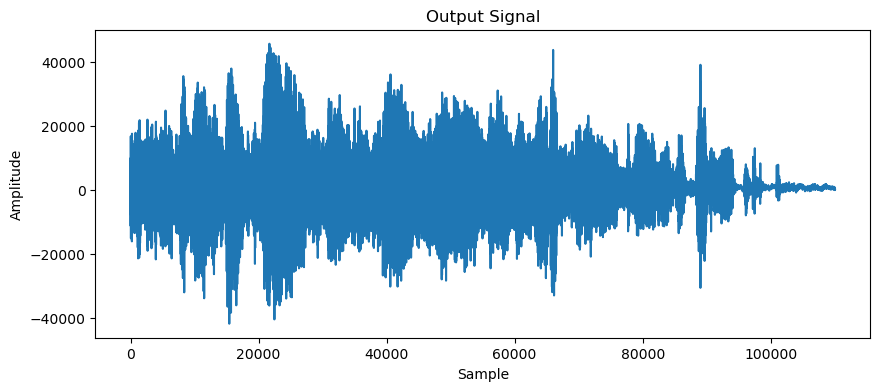

In [36]:
def convolution_sum(x, h):
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)
    for n in range(N + M - 1):
        for k in range(M):
            if n - k >= 0 and n - k < N:
                y[n] += x[n - k] * h[k]
    return y

# Define the impulse response h[n]
h = np.array([1, 0.5, 0, -0.25])

# Perform convolution sum using the input signal audio_data and the impulse response h
output_signal = convolution_sum(audio_data, h)

wavfile.write('fala_sino_convolution_sum.wav', sample_rate, output_signal.astype(np.int16))
# Plot the output signal
plt.figure(figsize=(10, 4))
plt.plot(output_signal)
plt.title('Output Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


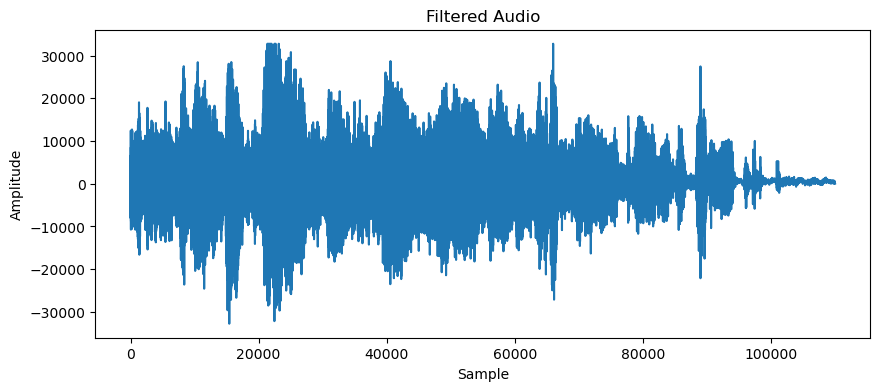

In [46]:

audio_fft = np.fft.fft(audio_data)
cutoff_freq = 0
# Get the absolute values of the Fourier transform
audio_fft_abs = np.abs(audio_fft)

# Find the index corresponding to the cutoff frequency
cutoff_index = np.where(audio_fft_abs > cutoff_freq)[0][-1]

# Filter the frequencies above the cutoff frequency
filtered_audio_fft = audio_fft.copy()
filtered_audio_fft[cutoff_index:100] = 0

# Perform inverse Fourier transform to get the filtered audio
filtered_audio = np.fft.ifft(filtered_audio_fft)

# Plot the filtered audio
plt.figure(figsize=(10, 4))
plt.plot(filtered_audio.real)
plt.title('Filtered Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

wavfile.write('fala_sino_filtered.wav', sample_rate, filtered_audio.real.astype(np.int16))
